In [163]:
#import all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import xgboost as xgb

In [164]:
#load the train and test data
train_set =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                       header = None)

In [165]:
test_set =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',skiprows = 1, 
                      header = None)

In [166]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
              'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
              'native_country', 'wage_class']

In [167]:
train_set.columns=col_labels
test_set.columns=col_labels

In [168]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [169]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [170]:
train_set.shape,test_set.shape


((32561, 15), (16281, 15))

In [171]:
#see the info of the data
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [172]:
#see the info of the data
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
wage_class        16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


## mixed kind of data is present in the training and Test Data

In [173]:
#checking the Null values in the data set or not
# Check for Null Data
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [174]:
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

## as per the above analysis there is no null values present in the data set

In [175]:
# Let's see how many unique categories we have in this property Target 
for col in train_set.columns:
    if train_set[col].dtype == object:
        print(col)
        print(set(train_set[col]))

workclass
{' Without-pay', ' Federal-gov', ' Never-worked', ' Self-emp-not-inc', ' Self-emp-inc', ' Private', ' ?', ' Local-gov', ' State-gov'}
education
{' Some-college', ' HS-grad', ' 5th-6th', ' 10th', ' Bachelors', ' 7th-8th', ' Assoc-acdm', ' 1st-4th', ' Prof-school', ' Assoc-voc', ' 12th', ' Masters', ' Doctorate', ' Preschool', ' 11th', ' 9th'}
marital_status
{' Married-AF-spouse', ' Married-civ-spouse', ' Separated', ' Divorced', ' Widowed', ' Married-spouse-absent', ' Never-married'}
occupation
{' Armed-Forces', ' Priv-house-serv', ' Sales', ' Machine-op-inspct', ' Handlers-cleaners', ' Other-service', ' Exec-managerial', ' Farming-fishing', ' Adm-clerical', ' ?', ' Protective-serv', ' Transport-moving', ' Prof-specialty', ' Craft-repair', ' Tech-support'}
relationship
{' Not-in-family', ' Husband', ' Wife', ' Other-relative', ' Own-child', ' Unmarried'}
race
{' Other', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' White', ' Black'}
sex
{' Female', ' Male'}
native_country
{'

In [176]:
for col in test_set.columns:
    if test_set[col].dtype == object:
        print(col)
        print(set(test_set[col]))

workclass
{' Without-pay', ' Federal-gov', ' Never-worked', ' Self-emp-not-inc', ' Self-emp-inc', ' Private', ' ?', ' Local-gov', ' State-gov'}
education
{' Some-college', ' HS-grad', ' 5th-6th', ' 10th', ' Bachelors', ' 7th-8th', ' Assoc-acdm', ' 1st-4th', ' Prof-school', ' Assoc-voc', ' 12th', ' Masters', ' Doctorate', ' Preschool', ' 11th', ' 9th'}
marital_status
{' Married-AF-spouse', ' Married-civ-spouse', ' Separated', ' Divorced', ' Widowed', ' Married-spouse-absent', ' Never-married'}
occupation
{' Armed-Forces', ' Priv-house-serv', ' Machine-op-inspct', ' Sales', ' Handlers-cleaners', ' Other-service', ' Exec-managerial', ' Farming-fishing', ' Adm-clerical', ' ?', ' Protective-serv', ' Transport-moving', ' Prof-specialty', ' Craft-repair', ' Tech-support'}
relationship
{' Not-in-family', ' Husband', ' Wife', ' Other-relative', ' Own-child', ' Unmarried'}
race
{' Other', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' White', ' Black'}
sex
{' Female', ' Male'}
native_country
{'

## As per the above anaylsis workclass .occupation ,native_country  have some invalid data like "?"


In [177]:
#need to check how many "?" data rows are present in workclass ,occupation ,native_country 
for col in train_set.columns:
    if train_set[col].dtype == object:
        print(col, (train_set[col].str.contains(' \?') == True).sum())

workclass 1836
education 0
marital_status 0
occupation 1843
relationship 0
race 0
sex 0
native_country 583
wage_class 0


In [178]:
for col in test_set.columns:
    if test_set[col].dtype == object:
        print(col, (test_set[col].str.contains(' \?') == True).sum())

workclass 963
education 0
marital_status 0
occupation 966
relationship 0
race 0
sex 0
native_country 274
wage_class 0


In [179]:
##before dropping the data, size of the data set
train_set.shape,test_set.shape

((32561, 15), (16281, 15))

In [180]:
## we want to drop all the ? value rows
train_set = train_set.replace(' ?', np.nan).dropna()
test_set = test_set.replace(' ?', np.nan).dropna()

In [181]:
##After dropping the data, size of the data set
train_set.shape,test_set.shape

((30162, 15), (15060, 15))

In [182]:
#now check whether we have '?" values data
for col in train_set.columns:
    if train_set[col].dtype == object:
        print(col, (train_set[col].str.contains(' \?') == True).sum())

workclass 0
education 0
marital_status 0
occupation 0
relationship 0
race 0
sex 0
native_country 0
wage_class 0


In [183]:
for col in test_set.columns:
    if test_set[col].dtype == object:
        print(col, (test_set[col].str.contains(' \?') == True).sum())

workclass 0
education 0
marital_status 0
occupation 0
relationship 0
race 0
sex 0
native_country 0
wage_class 0


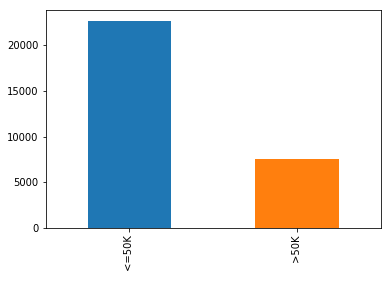

In [184]:
# Count of >50K & <=50K
train_set['wage_class'].value_counts().plot(kind="bar")

plt.show()

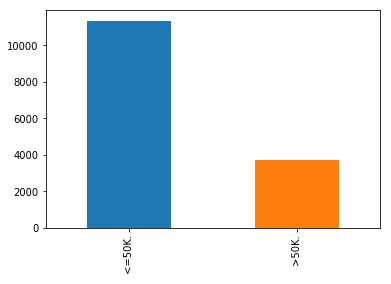

In [185]:
test_set['wage_class'].value_counts().plot(kind="bar")
plt.show()

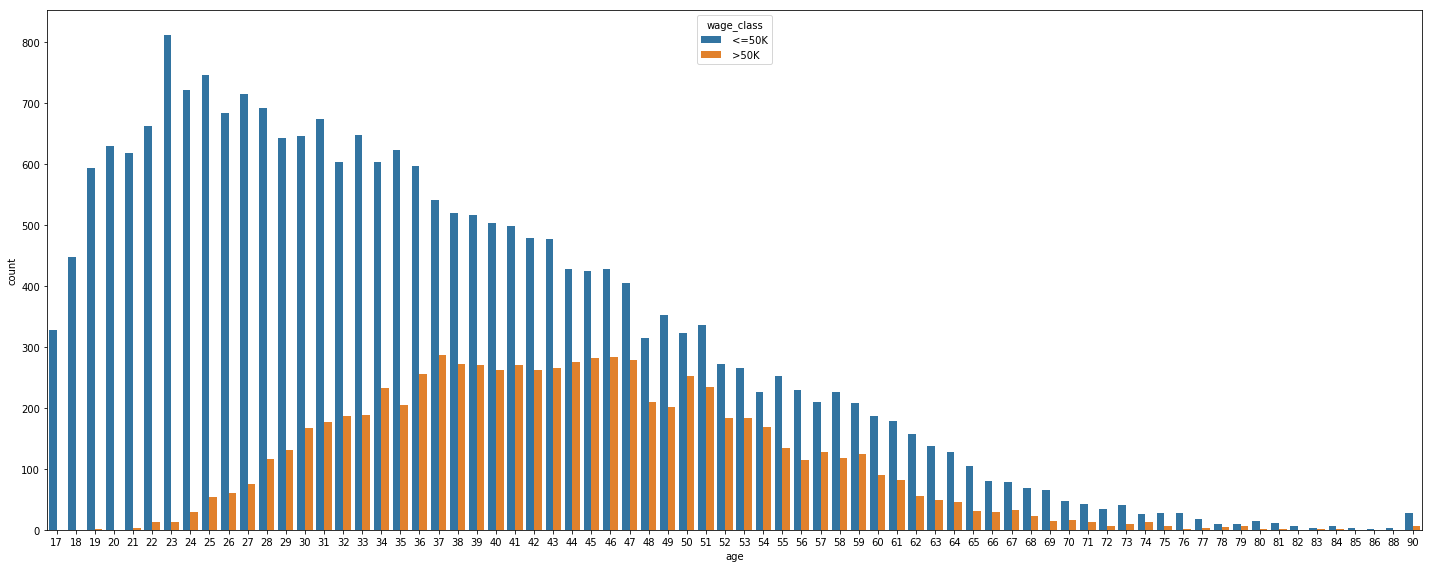

In [187]:

fig = plt.figure(figsize =  (20,8))
sns.countplot('age', hue = 'wage_class', data = train_set)
plt.tight_layout()

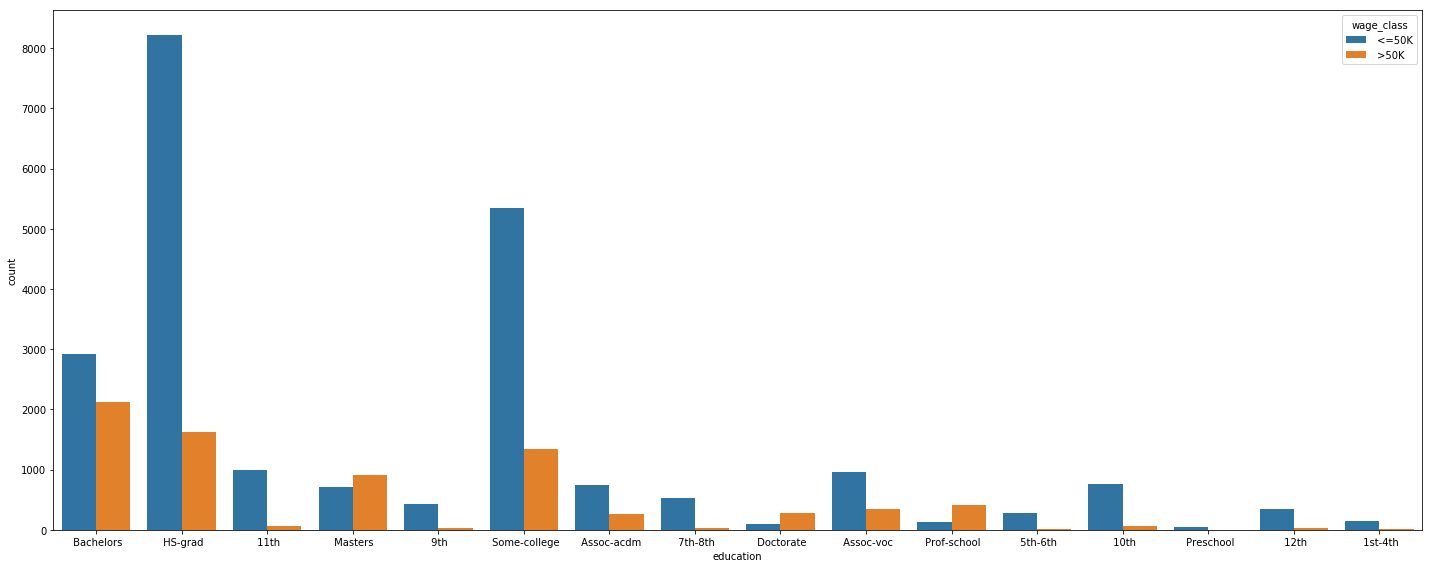

In [188]:
fig = plt.figure(figsize =  (20,8))
sns.countplot('education', hue = 'wage_class', data = train_set)
plt.tight_layout()

In [189]:
#changing wage_class categorical data into numerical data
train_set['wage_class'] = train_set['wage_class'].replace({'<=50K': 0, '>50K':1}, regex=True)

test_set['wage_class'] = test_set['wage_class'].replace({'<=50K': 0, '>50K':1}, regex=True)

In [190]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [191]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [192]:
#devide numerical and categorical features
num_columns=[]
for col in train_set.columns:
    if train_set[col].dtype =="int64":
        num_columns.append(col)
print(num_columns)

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'wage_class']


In [193]:
cat_columns=[]
for col in train_set.columns:
    if train_set[col].dtype == object:
        cat_columns.append(col)
print(cat_columns)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


In [194]:
num_columns=[]
for col in test_set.columns:
    if test_set[col].dtype =="int64":
        num_columns.append(col)
print(num_columns)

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'wage_class']


In [195]:
cat_columns=[]
for col in test_set.columns:
    if test_set[col].dtype == object:
        cat_columns.append(col)
print(cat_columns)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


## Get Basic Statistical Information

In [196]:
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,0.248922
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,0.432396
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [197]:
train_set.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
count,30162,30162,30162,30162,30162,30162,30162,30162
unique,7,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22286,9840,14065,4038,12463,25933,20380,27504


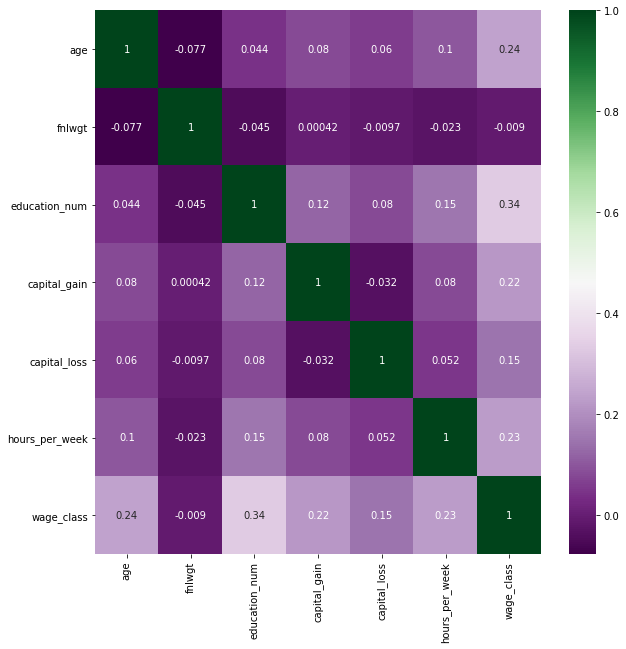

In [199]:
#need to know the correlation between the Numerical variables
#['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'wage_class']

plt.figure(figsize=(10,10))
sns.heatmap(train_set.corr(), annot = True,cmap= "PRGn")

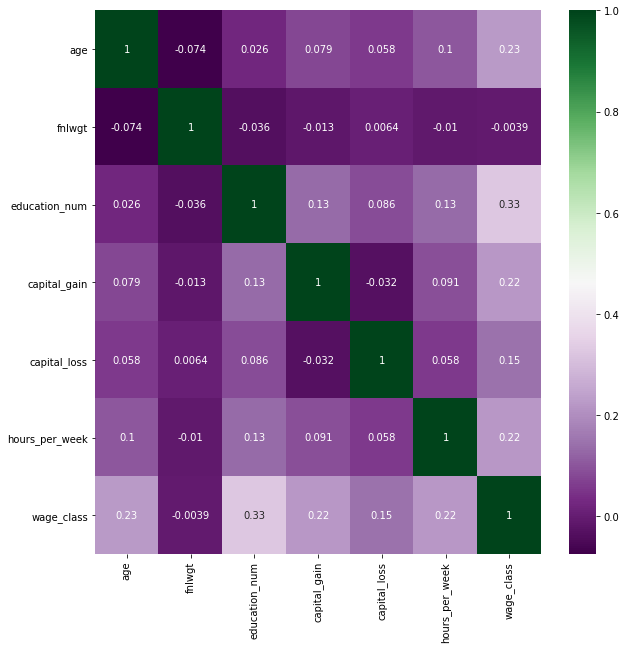

In [200]:
#need to know the correlation between the Numerical variables
#['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'wage_class']

plt.figure(figsize=(10,10))
sns.heatmap(test_set.corr(), annot = True,cmap= "PRGn")

## as per the above heat map education_num,age,hours-peak,capital_gain are the high co related to Wage_class

In [201]:
#change all categgorical varibles into numerical variables
# Encode the categorical features as numbers
from sklearn.preprocessing import LabelEncoder
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

In [202]:
# Calculate the correlation and plot it
#from sklearn.preprocessing import LabelEncoder
train_set, _ = number_encode_features(train_set)

In [203]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [204]:
test_set, _ = number_encode_features(test_set)

In [205]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,37,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,37,0


## we have converted all the categorical variable into Numerical variable and there is no need of feature scaling as XGBoost 
## inbuilt its support scaling.

In [206]:
#spliting the data as Feature and Target Variable

#X_train, X_test, y_train, y_test
X_train = train_set.drop('wage_class', axis =1)
y_train = train_set['wage_class']
X_test = test_set.drop('wage_class', axis =1)
y_test = test_set['wage_class']

In [207]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((30162, 14), (30162,), (15060, 14), (15060,))

In [208]:
# Fitting XGBoost to the Training set
# Fitting XGBoost to the Training set
import xgboost
classifier = xgboost.XGBClassifier()
classifier.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [209]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [210]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10785   575]
 [ 1510  2190]]


In [211]:
#score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Classification Report:\n ",classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)

print("Score is",score)

Classification Report:
               precision    recall  f1-score   support

          0       0.88      0.95      0.91     11360
          1       0.79      0.59      0.68      3700

avg / total       0.86      0.86      0.85     15060

Score is 0.8615537848605578


## above accuracy is acheived at the n_estimators=100


In [212]:
#lets try to increate the estimator and see the ouptut
classifier = xgboost.XGBClassifier(n_estimators= 500)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10810   550]
 [ 1415  2285]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [213]:
print("Classification Report:\n ",classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
print("Score is",score)

Classification Report:
               precision    recall  f1-score   support

          0       0.88      0.95      0.92     11360
          1       0.81      0.62      0.70      3700

avg / total       0.87      0.87      0.86     15060

Score is 0.8695219123505976
